In [1]:
#Importing the Required Librarires
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format', '{:f}'.format)

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Reading two data sets and concatinating them into single data frame
df1_1 = pd.read_csv("fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv("fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

df = pd.concat([df1_1,df1_2])
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job         dob  \
0  -81.178100      3495          Psychologist, counselling  1988-03-09   
1 -118.210500       149  Special educational needs teacher  1978-06-21   
2 -112.262000      4154        Nature conservation officer  1962-01-19   
3 -112.113800      1939                    Patent attorney  1967-01-12   
4  -79.462900        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
#Getting the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [4]:
#Checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.shape

(1852394, 22)

In [6]:
#Getting the percentage of Fraud data
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

is_fraud    count  percentage
0         0  1842743   99.478999
1         1     9651    0.521001

In [7]:
#Finding unique values in each column
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [8]:
#Converting the column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [9]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [10]:
#New column in a datetime format
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0          0
1          0
2          0
3          0
4          0
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 1852394, dtype: int64

In [11]:
#Naming days
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 1852394, dtype: object

In [12]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job         dob  \
0  -81.178100      3495          Psychologist, counselling  1988-03-09   
1 -118.210500       149  Special educational needs teacher  1978-06-21   
2 -112.262000      4154        Nature conservation officer  1962-01-19   
3 -112.113800      1939                    Patent attorney  1967-01-12   
4  -79.462900        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_hour day_of_week  
0         0           0     Tuesday  
1         0           0     Tuesday  
2         0           0     Tuesday  
3         0           0     Tuesday  
4         0           0     Tuesday

In [13]:
#Creating column with month
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2019-01
1         2019-01
2         2019-01
3         2019-01
4         2019-01
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 1852394, dtype: period[M]

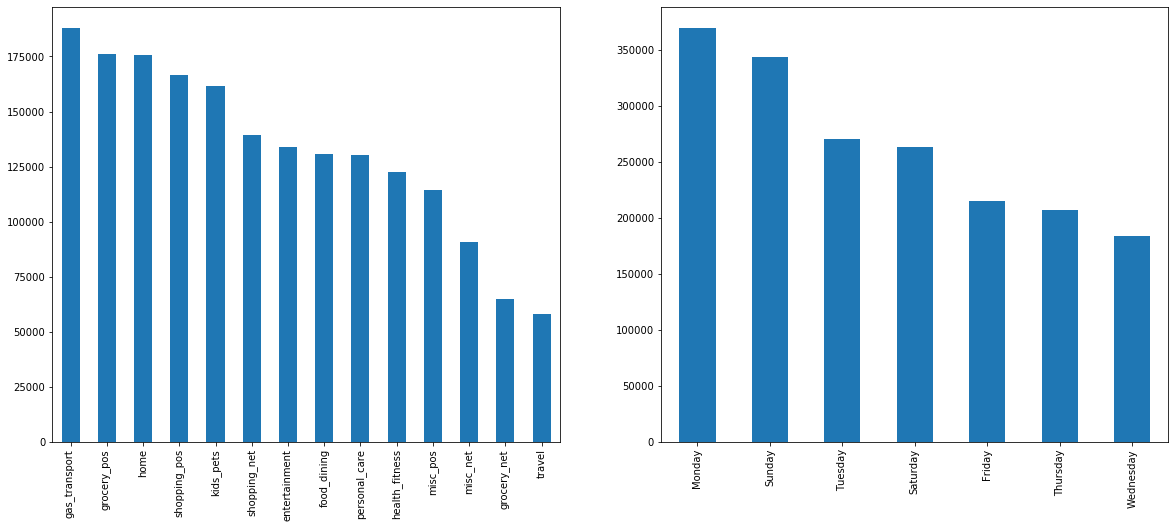

In [14]:
#Sunday and Monday of the week have highest credit card transactions
#Gas stores and grocery store POS has maximum value of transactions
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

In [15]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job         dob  \
0  -81.178100      3495          Psychologist, counselling  1988-03-09   
1 -118.210500       149  Special educational needs teacher  1978-06-21   
2 -112.262000      4154        Nature conservation officer  1962-01-19   
3 -112.113800      1939                    Patent attorney  1967-01-12   
4  -79.462900        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_hour day_of_week year_month  
0         0           0     Tuesday    2019-01  
1         0           0     Tuesday    2019-01  
2         0           0     Tuesday    2019-01  
3         0           0     Tuesday    2019-01  
4         0           0     Tuesday    2019-01

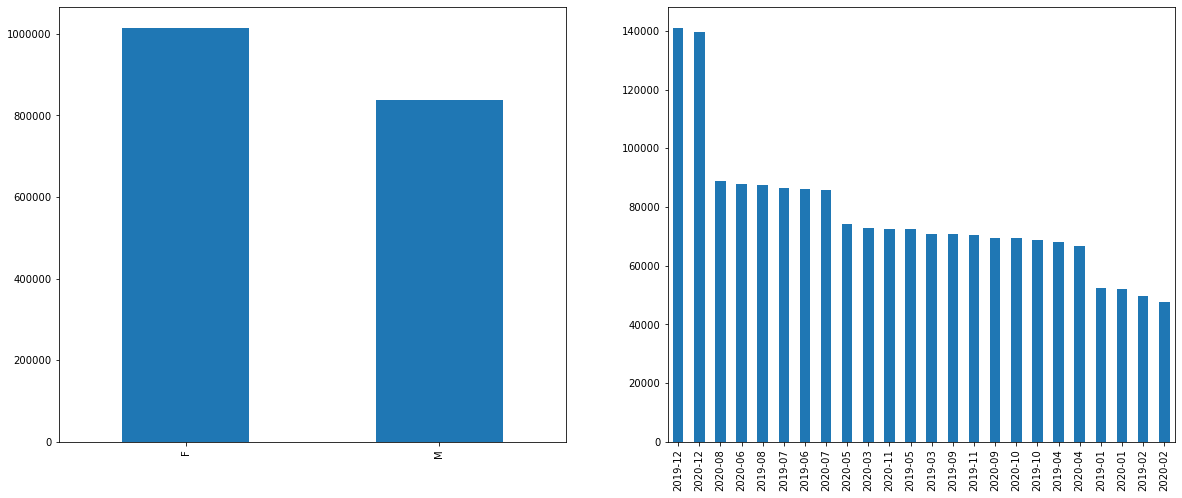

In [16]:
#Highest number of Transactions are in month of December
#Lowest number of Transactions happens in February
#No. of Females are more than Males 
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();

In [17]:
#State count
df.state.value_counts(normalize=True)

TX   0.073024
NY   0.064467
PA   0.061635
CA   0.043455
OH   0.035968
MI   0.035535
IL   0.033585
FL   0.032809
AL   0.031592
MO   0.029639
MN   0.024527
AR   0.024083
NC   0.023286
VA   0.022542
WI   0.022532
SC   0.022528
KY   0.022123
IN   0.021345
IA   0.020948
OK   0.020541
MD   0.020160
GA   0.020158
WV   0.019720
NJ   0.018965
NE   0.018584
KS   0.017782
MS   0.016207
LA   0.016170
WY   0.014995
WA   0.014597
OR   0.014256
TN   0.013449
ME   0.012650
NM   0.012647
ND   0.011435
CO   0.010671
SD   0.009487
MA   0.009481
VT   0.009076
MT   0.009073
AZ   0.008293
UT   0.008290
NH   0.006331
CT   0.005927
NV   0.004350
ID   0.004338
DC   0.002769
HI   0.001970
AK   0.001600
RI   0.000402
DE   0.000005
Name: state, dtype: float64

In [18]:
df.job.value_counts(normalize=True,ascending=False)

Film/video editor                                             0.007503
Exhibition designer                                           0.007108
Surveyor, land/geomatics                                      0.006713
Naval architect                                               0.006712
Materials engineer                                            0.006322
Designer, ceramics/pottery                                    0.006310
Environmental consultant                                      0.005924
Financial adviser                                             0.005918
Systems developer                                             0.005918
IT trainer                                                    0.005907
Copywriter, advertising                                       0.005529
Scientist, audiological                                       0.005525
Chartered public finance accountant                           0.005512
Chief Executive Officer                                       0.005506
Podiat

In [19]:
#Getting the date of birth in order to get the age
df['dob'] = pd.to_datetime(df['dob'])

In [20]:
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age']

0        31.000000
1        41.000000
2        57.000000
3        52.000000
4        33.000000
            ...   
555714   55.000000
555715   21.000000
555716   39.000000
555717   55.000000
555718   28.000000
Name: age, Length: 1852394, dtype: float64

In [21]:
#33-57 age people are 50% of our customers
#Minimum age of customer is 14
#Maximum age of customer is 96
df['age'].describe()

count   1852394.000000
mean         46.266173
std          17.412388
min          14.000000
25%          33.000000
50%          44.000000
75%          57.000000
max          96.000000
Name: age, dtype: float64

In [22]:
#Fraud Transaction mean is way higher than non-fraud transaction
#Mean of Non Fraud Transactions: 67.6
#Mean of Fraud Transactions: 530.6

pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count            1852394.000000              1842743.000000   
1     mean                 70.063567                   67.651278   
2      std                159.253975                  153.548108   
3      min                  1.000000                    1.000000   
4      50%                 47.450000                   47.240000   
5      95%                195.340000                  189.590000   
6    99.9%               1517.241050                 1519.622580   
7      max              28948.900000                28948.900000   

   Fraud Amt Distribution  
0             9651.000000  
1              530.661412  
2              391.028873  
3                1.060000  
4              390.000000  
5             1084.090000  
6             1293.127000  
7             1376.040000

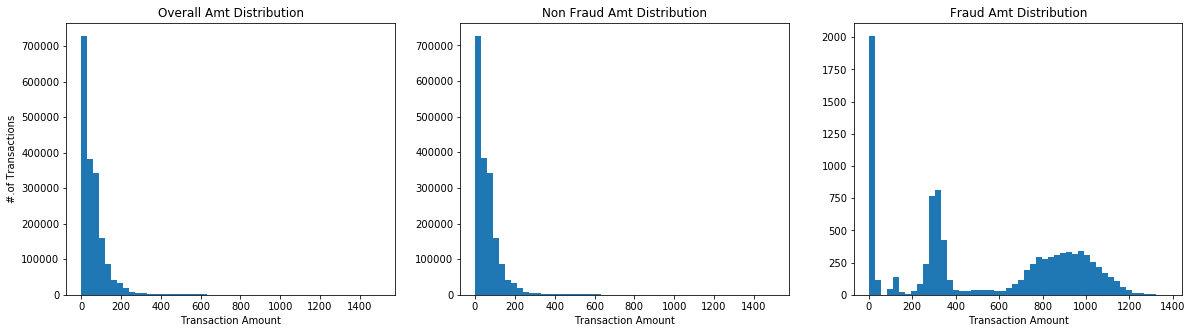

In [23]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1500]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

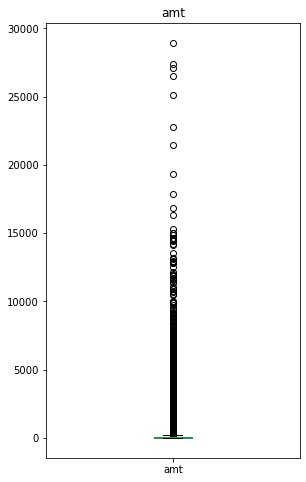

In [24]:
num_cols=['amt']
plt.figure(figsize=[10,8])
for ind, col in enumerate(num_cols):
    plt.subplot(1,2,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

In [25]:
#Year Month vs Number of Transactions
df_timeline01 = df.groupby(df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

year_month  num_of_transactions  customers
0     2019-01                52525        913
1     2019-02                49866        918
2     2019-03                70939        916
3     2019-04                68078        913
4     2019-05                72532        910
5     2019-06                86064        908
6     2019-07                86596        910
7     2019-08                87359        911
8     2019-09                70652        913
9     2019-10                68758        912
10    2019-11                70421        911
11    2019-12               141060        916
12    2020-01                52202        911
13    2020-02                47791        909
14    2020-03                72850        912
15    2020-04                66892        914
16    2020-05                74343        915
17    2020-06                87805        911
18    2020-07                85848        911
19    2020-08                88759        908
20    2020-09                69533        914
21    2020-10                69348        913
22    2020-11                72635        909
23    2020-12               139538        910

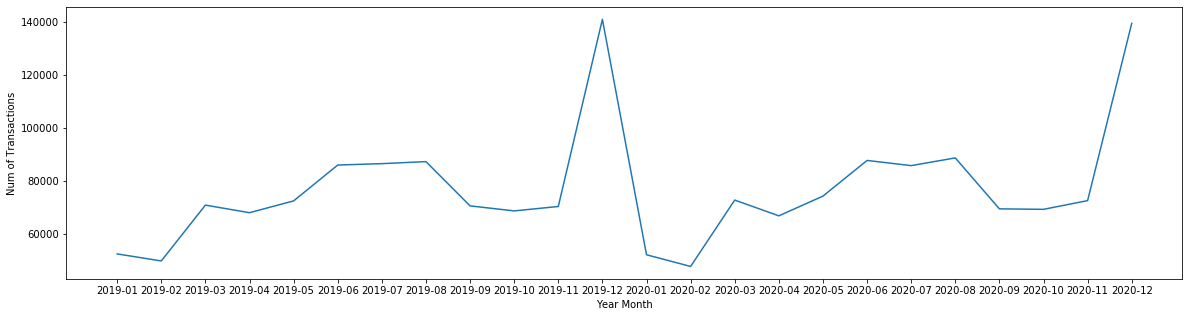

In [26]:
#Year Month vs Number of Customers Done the Transactions
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

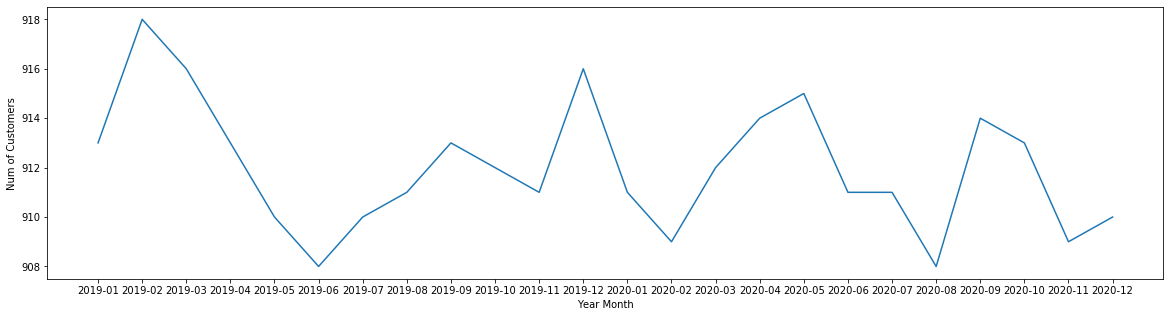

In [27]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [28]:
#FRAUD Transactions
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

year_month  num_of_fraud_transactions  fraud_customers
0     2019-01                        506               50
1     2019-02                        517               53
2     2019-03                        494               49
3     2019-04                        376               41
4     2019-05                        408               42
5     2019-06                        354               35
6     2019-07                        331               36
7     2019-08                        382               39
8     2019-09                        418               44
9     2019-10                        454               50
10    2019-11                        388               41
11    2019-12                        592               62
12    2020-01                        343               40
13    2020-02                        336               35
14    2020-03                        444               45
15    2020-04                        302               36
16    2020-05                        527               54
17    2020-06                        467               47
18    2020-07                        321               35
19    2020-08                        415               41
20    2020-09                        340               35
21    2020-10                        384               39
22    2020-11                        294               31
23    2020-12                        258               26

In [32]:
print(df_timeline02['num_of_fraud_transactions'].mean())

402.125


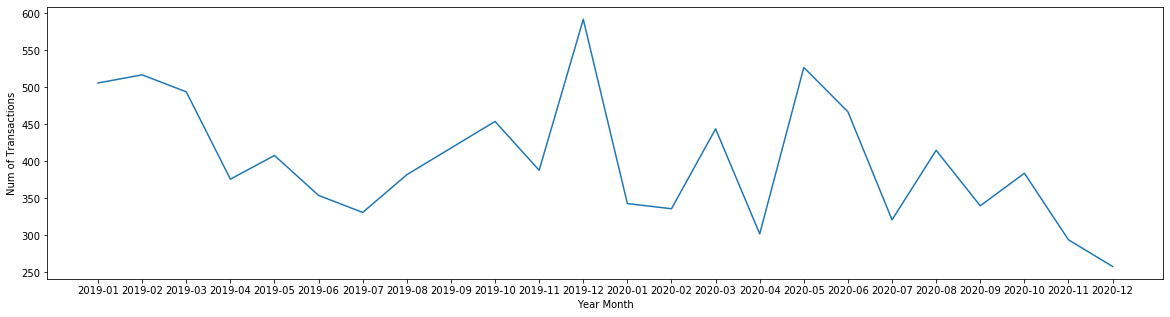

In [33]:
#Fraud transactions Month wise
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

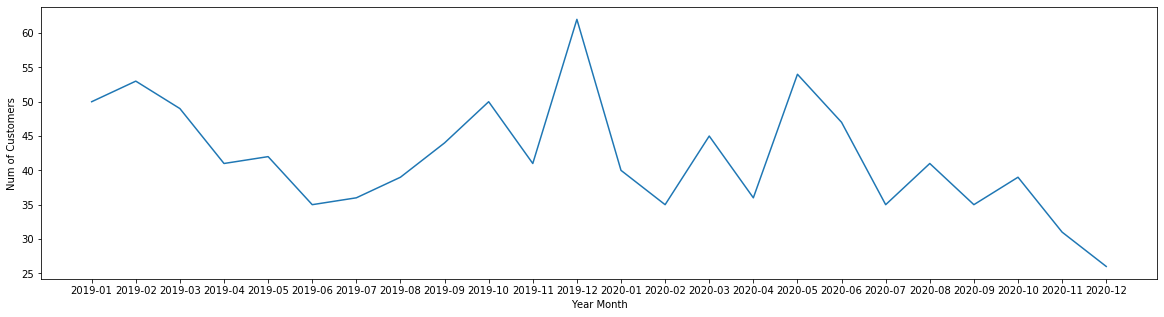

In [34]:
#Fraud customers month wise
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Customers')
plt.show()

In [35]:
#Gender distribution
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count   percent
0      F       1014749 54.780408
1      M        837645 45.219592

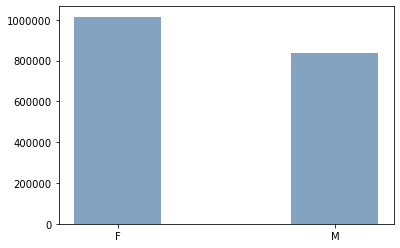

In [36]:
#Females customers are higher than male
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [37]:
# Gender count fraud/not fraud
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

Gender  is_fraud    count  gender_count  percent_grp
0      F         0  1009850       1014749    99.517221
1      F         1     4899       1014749     0.482779
2      M         0   832893        837645    99.432695
3      M         1     4752        837645     0.567305

In [38]:
# Category count and percentage
#gas_transport holds for 10% of the transactions
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

Category  category_count   percent
2    gas_transport          188029 10.150594
4      grocery_pos          176191  9.511529
6             home          175460  9.472067
12    shopping_pos          166463  8.986371
7        kids_pets          161727  8.730702
11    shopping_net          139322  7.521186
0    entertainment          134118  7.240252
1      food_dining          130729  7.057300
10   personal_care          130085  7.022534
5   health_fitness          122553  6.615925
9         misc_pos          114229  6.166561
8         misc_net           90654  4.893883
3      grocery_net           64878  3.502387
13          travel           57956  3.128708

In [39]:
df_category = df_category.sort_values(by = ['percent'], ascending=False).reset_index()
df_category

index        Category  category_count   percent
0       2   gas_transport          188029 10.150594
1       4     grocery_pos          176191  9.511529
2       6            home          175460  9.472067
3      12    shopping_pos          166463  8.986371
4       7       kids_pets          161727  8.730702
5      11    shopping_net          139322  7.521186
6       0   entertainment          134118  7.240252
7       1     food_dining          130729  7.057300
8      10   personal_care          130085  7.022534
9       5  health_fitness          122553  6.615925
10      9        misc_pos          114229  6.166561
11      8        misc_net           90654  4.893883
12      3     grocery_net           64878  3.502387
13     13          travel           57956  3.128708

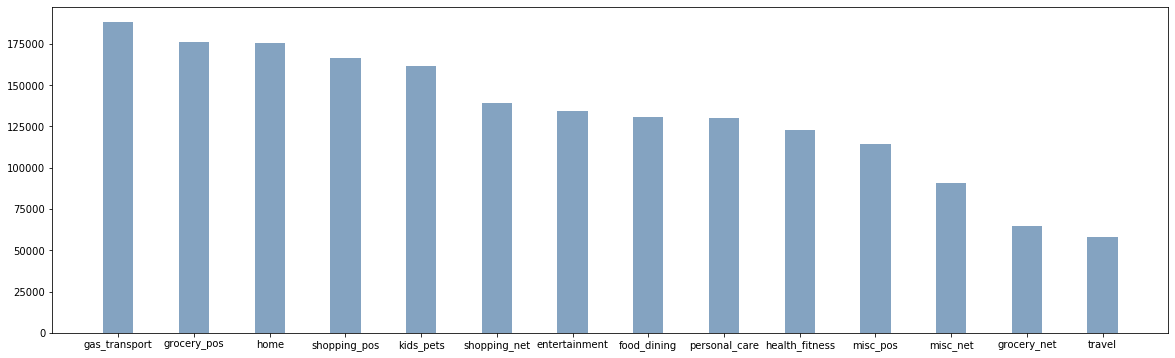

In [40]:
#Visualizations of spending
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [41]:
#Fraud count on the basis of the categories
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [42]:
#Sorting values in descending order on the basis of the category count
#grocery_pos and shopping_net has more number of fraud transactions compared to other categories
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

Category  is_fraud   count  category_count   percent  percent_grp
4    gas_transport         0  187257          188029 10.150594    99.589425
5    gas_transport         1     772          188029 10.150594     0.410575
8      grocery_pos         0  173963          176191  9.511529    98.735463
9      grocery_pos         1    2228          176191  9.511529     1.264537
13            home         1     265          175460  9.472067     0.151032
12            home         0  175195          175460  9.472067    99.848968
25    shopping_pos         1    1056          166463  8.986371     0.634375
24    shopping_pos         0  165407          166463  8.986371    99.365625
14       kids_pets         0  161423          161727  8.730702    99.812029
15       kids_pets         1     304          161727  8.730702     0.187971
23    shopping_net         1    2219          139322  7.521186     1.592713
22    shopping_net         0  137103          139322  7.521186    98.407287
1    entertainment         1     292          134118  7.240252     0.217719
0    entertainment         0  133826          134118  7.240252    99.782281
3      food_dining         1     205          130729  7.057300     0.156813
2      food_dining         0  130524          130729  7.057300    99.843187
20   personal_care         0  129795          130085  7.022534    99.777069
21   personal_care         1     290          130085  7.022534     0.222931
11  health_fitness         1     185          122553  6.615925     0.150955
10  health_fitness         0  122368          122553  6.615925    99.849045
18        misc_pos         0  113907          114229  6.166561    99.718110
19        misc_pos         1     322          114229  6.166561     0.281890
16        misc_net         0   89472           90654  4.893883    98.696141
17        misc_net         1    1182           90654  4.893883     1.303859
7      grocery_net         1     175           64878  3.502387     0.269737
6      grocery_net         0   64703           64878  3.502387    99.730263
26          travel         0   57800           57956  3.128708    99.730830
27          travel         1     156           57956  3.128708     0.269170

In [43]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

Category  is_fraud  count  category_count   percent  percent_grp
11  health_fitness         1    185          122553  6.615925     0.150955
13            home         1    265          175460  9.472067     0.151032
3      food_dining         1    205          130729  7.057300     0.156813
15       kids_pets         1    304          161727  8.730702     0.187971
1    entertainment         1    292          134118  7.240252     0.217719
21   personal_care         1    290          130085  7.022534     0.222931
27          travel         1    156           57956  3.128708     0.269170
7      grocery_net         1    175           64878  3.502387     0.269737
19        misc_pos         1    322          114229  6.166561     0.281890
5    gas_transport         1    772          188029 10.150594     0.410575
25    shopping_pos         1   1056          166463  8.986371     0.634375
9      grocery_pos         1   2228          176191  9.511529     1.264537
17        misc_net         1   1182           90654  4.893883     1.303859
23    shopping_net         1   2219          139322  7.521186     1.592713

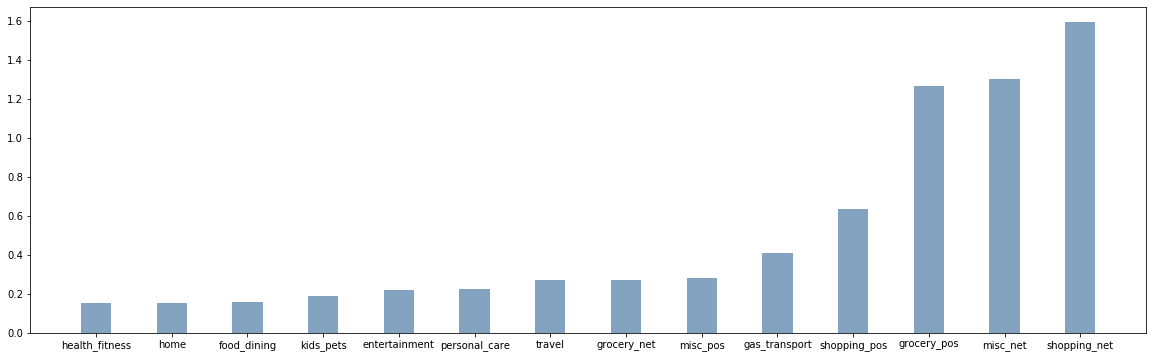

In [44]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [45]:
#Merchant
df.merchant.value_counts(normalize=True, ascending=False)

fraud_Kilback LLC                             0.003380
fraud_Cormier LLC                             0.002832
fraud_Schumm PLC                              0.002804
fraud_Kuhn LLC                                0.002716
fraud_Boyer PLC                               0.002699
fraud_Dickinson Ltd                           0.002674
fraud_Emard Inc                               0.002088
fraud_Cummerata-Jones                         0.002084
fraud_Corwin-Collins                          0.002080
fraud_Rodriguez Group                         0.002075
fraud_Kling Inc                               0.002074
fraud_Parisian and Sons                       0.002072
fraud_Erdman-Kertzmann                        0.002072
fraud_Huels-Hahn                              0.002070
fraud_Stroman, Hudson and Erdman              0.002067
fraud_Kutch LLC                               0.002067
fraud_Jenkins, Hauck and Friesen              0.002061
fraud_Prohaska-Murray                         0.002056
fraud_Olso

In [46]:
#Merchant percentage and sorting in descending values
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

Merchant  merchant_count  percent
316                            fraud_Kilback LLC            6262 0.338049
105                            fraud_Cormier LLC            5246 0.283201
571                             fraud_Schumm PLC            5195 0.280448
349                               fraud_Kuhn LLC            5031 0.271594
70                               fraud_Boyer PLC            4999 0.269867
136                          fraud_Dickinson Ltd            4953 0.267384
157                              fraud_Emard Inc            3867 0.208757
117                        fraud_Cummerata-Jones            3860 0.208379
107                         fraud_Corwin-Collins            3853 0.208001
522                        fraud_Rodriguez Group            3843 0.207461
321                              fraud_Kling Inc            3841 0.207353
474                      fraud_Parisian and Sons            3839 0.207245
162                       fraud_Erdman-Kertzmann            3839 0.207245
272                             fraud_Huels-Hahn            3835 0.207029
607             fraud_Stroman, Hudson and Erdman            3829 0.206705
358                              fraud_Kutch LLC            3828 0.206652
285             fraud_Jenkins, Hauck and Friesen            3817 0.206058
488                        fraud_Prohaska-Murray            3809 0.205626
463                 fraud_Olson, Becker and Koch            3806 0.205464
153          fraud_Eichmann, Bogan and Rodriguez            3798 0.205032
208          fraud_Greenholt, Jacobi and Gleason            3794 0.204816
92   fraud_Christiansen, Goyette and Schamberger            3794 0.204816
24                       fraud_Bartoletti-Wunsch            3793 0.204762
99          fraud_Connelly, Reichert and Fritsch            3788 0.204492
444                            fraud_Mraz-Herzog            3788 0.204492
43                               fraud_Berge LLC            3786 0.204384
605               fraud_Streich, Hansen and Veum            3785 0.204330
55                               fraud_Bins-Rice            3784 0.204276
77                         fraud_Brekke and Sons            3781 0.204114
183                          fraud_Friesen-Stamm            3774 0.203736
625                           fraud_Torp-Labadie            3769 0.203466
381                    fraud_Ledner-Pfannerstill            3764 0.203197
498            fraud_Raynor, Reinger and Hagenes            3763 0.203143
332                          fraud_Koss and Sons            3758 0.202873
559                            fraud_Schmitt Inc            3747 0.202279
622         fraud_Tillman, Dickinson and Labadie            3746 0.202225
549            fraud_Schaefer, McGlynn and Bosco            3742 0.202009
47                            fraud_Bernhard Inc            3741 0.201955
360           fraud_Kutch, Hermiston and Farrell            3725 0.201091
103                     fraud_Conroy-Cruickshank            3722 0.200929
119                           fraud_Cummings LLC            3721 0.200875
691                 fraud_Zieme, Bode and Dooley            3720 0.200821
590                             fraud_Sporer Inc            3719 0.200767
399                           fraud_Luettgen PLC            3719 0.200767
273                            fraud_Huels-Nolan            3714 0.200497
389                 fraud_Lind, Huel and McClure            3714 0.200497
518          fraud_Robel, Cummerata and Prosacco            3701 0.199796
231                             fraud_Harris Inc            3700 0.199742
365                            fraud_Kuvalis Ltd            3700 0.199742
508                fraud_Reilly, Heaney and Cole            3698 0.199634
497               fraud_Raynor, Feest and Miller            3673 0.198284
548         fraud_Schaefer, Maggio and Daugherty            3671 0.198176
468                       fraud_Pacocha-O'Reilly            3650 0.197042
243                         fraud_Heller-Lan

In [47]:
#Merging the is_fraud column with percent and creating another column
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [48]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

Merchant  is_fraud  count  \
673                             fraud_Kozey-Boehm         1     60   
490             fraud_Herman, Treutel and Dickens         1     38   
1226                             fraud_Terry-Huel         1     56   
607                         fraud_Kerluke-Abshire         1     50   
884           fraud_Mosciski, Ziemann and Farrell         1     53   
1105          fraud_Schmeler, Bashirian and Price         1     52   
691                               fraud_Kuhic LLC         1     53   
563                                fraud_Jast Ltd         1     51   
743          fraud_Langworth, Boehm and Gulgowski         1     52   
1051   fraud_Romaguera, Cruickshank and Greenholt         1     51   
145                          fraud_Boyer-Reichert         1     51   
476           fraud_Heathcote, Yost and Kertzmann         1     51   
401                             fraud_Goyette Inc         1     50   
771                           fraud_Lemke-Gutmann         1     50   
840                            fraud_Medhurst PLC         1     48   
985                            fraud_Rau and Sons         1     60   
474                           fraud_Heathcote LLC         1     47   
299                             fraud_Durgan-Auer         1     31   
419        fraud_Greenholt, O'Hara and Balistreri         1     46   
866                fraud_Moore, Dibbert and Koepp         1     31   
73                             fraud_Bednar Group         1     31   
693                 fraud_Kuhic, Bins and Pfeffer         1     47   
971                               fraud_Price Inc         1     47   
387                      fraud_Gleason-Macejkovic         1     48   
605             fraud_Kerluke, Kertzmann and Wiza         1     29   
1182       fraud_Stanton, Jakubowski and Baumbach         1     47   
293                               fraud_Doyle Ltd         1     57   
159                               fraud_Brown PLC         1     28   
850                           fraud_Miller-Harris         1     29   
683                            fraud_Kris-Weimann         1     28   
733               fraud_Labadie, Treutel and Bode         1     44   
1109                       fraud_Schmidt and Sons         1     45   
1180                          fraud_Stamm-Witting         1     43   
55                          fraud_Bashirian Group         1     43   
1016                             fraud_Rempel Inc         1     43   
397         fraud_Gottlieb, Considine and Schultz         1     44   
854                fraud_Moen, Reinger and Murphy         1     53   
351                       fraud_Fisher-Schowalter         1     44   
1254             fraud_Towne, Greenholt and Koepp         1     43   
831                       fraud_McGlynn-Heathcote         1     28   
809                             fraud_Mante Group         1     27   
1134            fraud_Schultz, Simonis and Little         1     52   
63               fraud_Baumbach, Feeney and Morar         1     42   
1202           fraud_Streich, Dietrich and Barton         1     42   
1288                            fraud_Volkman Ltd         1     27   
1240           fraud_Tillman, Fritsch and Schmitt         1     28   
942                           fraud_Padberg-Welch         1     52   
349                              fraud_Fisher Inc         1     43   
621             fraud_Kihn, Abernathy and Douglas         1     41   
894                            fraud_Nader-Heller         1     26   
948       fraud_Parisian, Schiller and Altenwerth         1     27   
617                          fraud_Kiehn-Emmerich         1     53   
131                       fraud_Bogisich-Homenick         1     27   
653                        fraud_Koelpin and Sons         1     27   
27                                fraud_Auer-West         1     41   
707                       fraud_Kuphal-Bartoletti         1     27   
13          fraud_Altenwerth, Cartwright and Koss  

In [49]:
#One Hot-Encoding for converting the features into numberic values
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [50]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [51]:
df1.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job        dob  \
0  -81.178100      3495          Psychologist, counselling 1988-03-09   
1 -118.210500       149  Special educational needs teacher 1978-06-21   
2 -112.262000      4154        Nature conservation officer 1962-01-19   
3 -112.113800      1939                    Patent attorney 1967-01-12   
4  -79.462900        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_hour day_of_week year_month       age  \
0         0           0     Tuesday    2019-01 31.000000   
1         0           0     Tuesday    2019-01 41.000000   
2         0           0     Tuesday    2019-01 57.000000   
3         0           0     Tuesday    2019-01 52.000000   
4         0           0     Tuesday    2019-01 33.000000   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0     

In [52]:
#Calculate the great circle distance between two points on the earth (specified in decimal degrees or in radians). All (lat, lon) coordinates must have numeric dtypes and be of equal length.
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [53]:
#Calling the funtion with the given lat and lon coordinates
df1['dist'] = \
    haversine(df1['lat'], df1['long'],
                 df1['merch_lat'], df1['merch_long'])

In [54]:
df1['dist'].describe()

count   1852394.000000
mean         76.111726
std          29.116970
min           0.022255
25%          55.320087
50%          78.216380
75%          98.509467
max         152.117173
Name: dist, dtype: float64

In [55]:
df1.dtypes

trans_date_trans_time      datetime64[ns]
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
trans_hour                          int64
day_of_week                       

In [56]:
df1.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_hour', 'day_of_week', 'year_month',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M', 'week_Monday', 'week_Saturday', 'week_Sunday',
       'week_Thursday', 'week_Tuesday', 'week_Wednesday', 'dist'],
      dtype='object')

In [57]:
#Renaming the index column to time_index
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                           amt      first     last gender  \
time_index                                                  
2019-01-01 00:00:18   4.970000   Jennifer    Banks      F   
2019-01-01 00:00:44 107.230000  Stephanie     Gill      F   
2019-01-01 00:00:51 220.110000     Edward  Sanchez      M   
2019-01-01 00:01:16  45.000000     Jeremy    White      M   
2019-01-01 00:03:06  41.960000      Tyler   Garcia      M   

                                           street            city state  \
time_index                                                                
2019-01-01 00:00:18                561 Perry Cove  Moravian Falls    NC   
2019-01-01 00:00:44  43039 Riley Greens Suite 393          Orient    WA   
2019-01-01 00:00:51      594 White Dale Suite 530      Malad City    ID   
2019-01-01 00:01:16   9443 Cynthia Court Apt. 038         Boulder    MT   
2019-01-01 00:03:06              408 Bradley Rest        Doe Hill    VA   

                       zip       lat        long  city_pop  \
time_index                                                   
2019-01-01 00:00:18  28654 36.078800  -81.178100      3495   
2019-01-01 00:00:44  99160 48.887800 -118.210500       149   
2019-01-01 00:00:51  83252 42.180800 -112.262000      4154   
2019-01-01 00:01:16  59632 46.230600 -112.113800      1939   
2019-01-01 00:03:06  24433 38.420700  -79.462900        99   

                                                   job        dob  \
time_index                                                          
2019-01-01 00:00:18          Psychologist, counselling 1988-03-09   
2019-01-01 00:00:44  Special educational needs teacher 1978-06-21   
2019-01-01 00:00:51        Nature conservation officer 1962-01-19   
2019-01-01 00:01:16                    Patent attorney 1967-01-12   
2019-01-01 00:03:06     Dance movement psychotherapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
time_index                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long  is_fraud  trans_hour day_of_week year_month  \
time_index                                                                     
2019-01-01 00:00:18  -82.048315         0           0     Tuesday    2019-01   
2019-01-01 00:00:44 -118.186462         0           0     Tuesday    2019-01   
2019-01-01 00:00:51 -112.154481         0           0     Tuesday    2019-01   
2019-01-01 00:01:16 -112.561071         0           0     Tuesday    2019-01   
2019-01-01 00:03:06  -78.632459         0           0     Tuesday    2019-01   

                          age  category_food_dining  category_ga

In [58]:
df1['val_for_agg'] = 1

In [59]:
#60 days transactions by customer¶
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [60]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [61]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [62]:
df_hist_trans_60d.head()

cc_num  trans_date  hist_trans_60d
0  60416207185  2019-01-01        0.000000
1  60416207185  2019-01-02        1.000000
2  60416207185  2019-01-03        5.000000
3  60416207185  2019-01-04        7.000000
4  60416207185  2019-01-05        9.000000

In [63]:
#24 hours order by customer
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [64]:
df_hist_orders_24h.head()

cc_num trans_date_trans_time  hist_trans_24h
0  60416207185   2019-01-01 12:47:15        0.000000
1  60416207185   2019-01-02 08:44:57        1.000000
2  60416207185   2019-01-02 08:47:36        2.000000
3  60416207185   2019-01-02 12:38:14        3.000000
4  60416207185   2019-01-02 13:10:46        4.000000

In [65]:
#24 hrs fraud historic transactions
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [66]:
df_hist_fraud_trans_24h.head()

cc_num trans_date_trans_time  hist_fraud_trans_24h
0  60416207185   2019-03-01 01:32:53              0.000000
1  60416207185   2019-03-01 02:42:25              1.000000
2  60416207185   2019-03-01 23:06:58              2.000000
3  60416207185   2019-03-02 22:10:38              3.000000
4  60416207185   2019-03-02 22:10:59              2.000000

In [67]:
#2 Hours Fraud by Customers¶
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [68]:
df_hist_fraud_trans_2h.head()

cc_num trans_date_trans_time  hist_fraud_trans_2h
0  60416207185   2019-03-01 01:32:53             0.000000
1  60416207185   2019-03-01 02:42:25             1.000000
2  60416207185   2019-03-01 23:06:58             2.000000
3  60416207185   2019-03-02 22:10:38             1.000000
4  60416207185   2019-03-02 22:10:59             1.000000

In [69]:
#60 Day Orders Amt Avg by Customers
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [70]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [71]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [72]:
df_hist_trans_amt_avg_60d.head(10)

cc_num  trans_date  hist_trans_avg_amt_60d
0  60416207185  2019-01-01                0.000000
1  60416207185  2019-01-02                7.270000
2  60416207185  2019-01-03               35.188333
3  60416207185  2019-01-04               31.365714
4  60416207185  2019-01-05               40.378889
5  60416207185  2019-01-06               43.053636
6  60416207185  2019-01-07               48.005000
7  60416207185  2019-01-08               60.016154
8  60416207185  2019-01-09               70.423125
9  60416207185  2019-01-10               69.753889

In [73]:
#Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [74]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [75]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [76]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [77]:
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job        dob  \
0  -81.178100      3495          Psychologist, counselling 1988-03-09   
1 -118.210500       149  Special educational needs teacher 1978-06-21   
2 -112.262000      4154        Nature conservation officer 1962-01-19   
3 -112.113800      1939                    Patent attorney 1967-01-12   
4  -79.462900        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_hour day_of_week year_month       age  \
0         0           0     Tuesday    2019-01 31.000000   
1         0           0     Tuesday    2019-01 41.000000   
2         0           0     Tuesday    2019-01 57.000000   
3         0           0     Tuesday    2019-01 52.000000   
4         0           0     Tuesday    2019-01 33.000000   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0     

In [78]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [79]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [80]:
#Heat map
#hist_fraud_trans_24h is highly correlated with is_fraud - 0.77
#hist_trans_24h is also correlated with hist_trans_60d - 0.56
corr = df2[cols].corr()

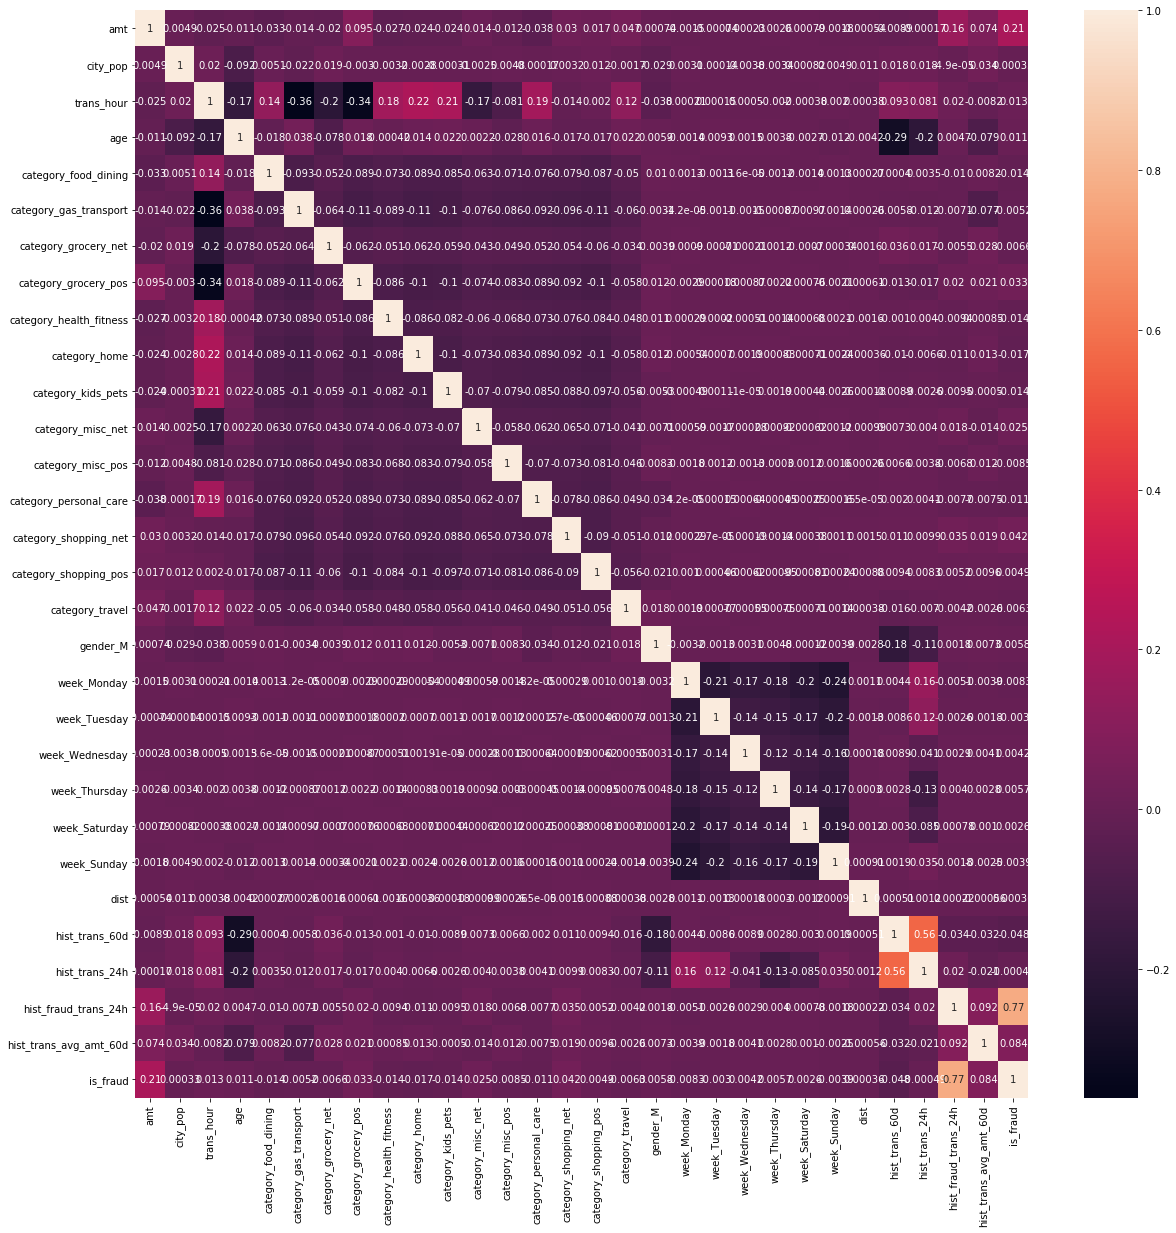

In [81]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(corr, annot=True)
plt.show()

In [82]:
import plotly
import plotly.graph_objects as go 

In [83]:
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job        dob  \
0  -81.178100      3495          Psychologist, counselling 1988-03-09   
1 -118.210500       149  Special educational needs teacher 1978-06-21   
2 -112.262000      4154        Nature conservation officer 1962-01-19   
3 -112.113800      1939                    Patent attorney 1967-01-12   
4  -79.462900        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_hour day_of_week year_month       age  \
0         0           0     Tuesday    2019-01 31.000000   
1         0           0     Tuesday    2019-01 41.000000   
2         0           0     Tuesday    2019-01 57.000000   
3         0           0     Tuesday    2019-01 52.000000   
4         0           0     Tuesday    2019-01 33.000000   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0     

In [84]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [85]:
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','tran_count_by_job']

df_job['percent'] = (df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

Job  tran_count_by_job  \
194                                  Film/video editor              13898   
188                                Exhibition designer              13167   
442                           Surveyor, land/geomatics              12436   
309                                    Naval architect              12434   
287                                 Materials engineer              11711   
121                         Designer, ceramics/pottery              11688   
179                           Environmental consultant              10974   
195                                  Financial adviser              10963   
447                                  Systems developer              10962   
240                                         IT trainer              10943   
110                            Copywriter, advertising              10241   
410                            Scientist, audiological              10234   
71                 Chartered public finance accountant              10211   
74                             Chief Executive Officer              10199   
346                                         Podiatrist               9525   
102                                        Comptroller               9515   
278                           Magazine features editor               9506   
16                             Agricultural consultant               9500   
329                                          Paramedic               9494   
439                                                Sub               9488   
42                              Audiological scientist               8801   
227  Historic buildings inspector/conservation officer               8787   
55                                   Building surveyor               8786   
272                                  Librarian, public               8773   
307                                           Musician               8772   
415                        Scientist, research (maths)               8768   
44                                           Barrister               8767   
91                       Clothing/textile technologist               8765   
299                                    Mining engineer               8762   
243                                       Immunologist               8760   
492                                     Water engineer               8740   
383                                  Quantity surveyor               8080   
288                                Mechanical engineer               8062   
418                           Secondary school teacher               8056   
196                                   Financial trader               8054   
353                                     Prison officer               8054   
261                            Land/geomatics surveyor               8052   
406                             Sales professional, IT               8052   
155                               Engineer, automotive               8050   
113                                         Counsellor               8047   
335                                 Petroleum engineer               8046   
373                             Psychologist, forensic               8044   
86                           Claims inspector/assessor               8042   
137                                Early years teacher               8041   
216                                       Geoscientist               8041   
151                                    Energy engineer               8038   
333                                Pensions consultant               8036   
376                             Psychotherapist, child               8036   
281                                               Make               8028   
198                                        Firefighter               8021   
72                                   Chemical engineer               7334   
408                                     Science

In [86]:
df_fraud_job = df[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job =  df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100

In [87]:
job_plt_data = df_fraud_job.sort_values(by = ["tran_count_by_job"], ascending = False).head(20)

In [88]:
job_plt_data

Job  is_fraud  count  tran_count_by_job  percent  \
378           Film/video editor         1     52              13898 0.750272   
377           Film/video editor         0  13846              13898 0.750272   
366         Exhibition designer         1     51              13167 0.710810   
365         Exhibition designer         0  13116              13167 0.710810   
861    Surveyor, land/geomatics         0  12386              12436 0.671347   
862    Surveyor, land/geomatics         1     50              12436 0.671347   
603             Naval architect         1     66              12434 0.671239   
602             Naval architect         0  12368              12434 0.671239   
559          Materials engineer         1     62              11711 0.632209   
558          Materials engineer         0  11649              11711 0.632209   
235  Designer, ceramics/pottery         0  11665              11688 0.630967   
236  Designer, ceramics/pottery         1     23              11688 0.630967   
347    Environmental consultant         0  10937              10974 0.592423   
348    Environmental consultant         1     37              10974 0.592423   
379           Financial adviser         0  10921              10963 0.591829   
380           Financial adviser         1     42              10963 0.591829   
871           Systems developer         0  10920              10962 0.591775   
872           Systems developer         1     42              10962 0.591775   
467                  IT trainer         0  10906              10943 0.590749   
468                  IT trainer         1     37              10943 0.590749   

     percent_grp  
378     0.374155  
377    99.625845  
366     0.387332  
365    99.612668  
861    99.597941  
862     0.402059  
603     0.530803  
602    99.469197  
559     0.529417  
558    99.470583  
235    99.803217  
236     0.196783  
347    99.662839  
348     0.337161  
379    99.616893  
380     0.383107  
871    99.616858  
872     0.383142  
467    99.661884  
468     0.338116

In [89]:
job_plt_data['label'] = 'Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]= 'Fraud'
job_plt_data

Job  is_fraud  count  tran_count_by_job  percent  \
378           Film/video editor         1     52              13898 0.750272   
377           Film/video editor         0  13846              13898 0.750272   
366         Exhibition designer         1     51              13167 0.710810   
365         Exhibition designer         0  13116              13167 0.710810   
861    Surveyor, land/geomatics         0  12386              12436 0.671347   
862    Surveyor, land/geomatics         1     50              12436 0.671347   
603             Naval architect         1     66              12434 0.671239   
602             Naval architect         0  12368              12434 0.671239   
559          Materials engineer         1     62              11711 0.632209   
558          Materials engineer         0  11649              11711 0.632209   
235  Designer, ceramics/pottery         0  11665              11688 0.630967   
236  Designer, ceramics/pottery         1     23              11688 0.630967   
347    Environmental consultant         0  10937              10974 0.592423   
348    Environmental consultant         1     37              10974 0.592423   
379           Financial adviser         0  10921              10963 0.591829   
380           Financial adviser         1     42              10963 0.591829   
871           Systems developer         0  10920              10962 0.591775   
872           Systems developer         1     42              10962 0.591775   
467                  IT trainer         0  10906              10943 0.590749   
468                  IT trainer         1     37              10943 0.590749   

     percent_grp      label  
378     0.374155      Fraud  
377    99.625845  Not Fraud  
366     0.387332      Fraud  
365    99.612668  Not Fraud  
861    99.597941  Not Fraud  
862     0.402059      Fraud  
603     0.530803      Fraud  
602    99.469197  Not Fraud  
559     0.529417      Fraud  
558    99.470583  Not Fraud  
235    99.803217  Not Fraud  
236     0.196783      Fraud  
347    99.662839  Not Fraud  
348     0.337161      Fraud  
379    99.616893  Not Fraud  
380     0.383107      Fraud  
871    99.616858  Not Fraud  
872     0.383142      Fraud  
467    99.661884  Not Fraud  
468     0.338116      Fraud

In [90]:
ne_grp = job_plt_data['Job'].unique()
print(ne_grp)

rm_grp = job_plt_data['label'].unique()
print(rm_grp)

['Film/video editor' 'Exhibition designer' 'Surveyor, land/geomatics'
 'Naval architect' 'Materials engineer' 'Designer, ceramics/pottery'
 'Environmental consultant' 'Financial adviser' 'Systems developer'
 'IT trainer']
['Fraud' 'Not Fraud']


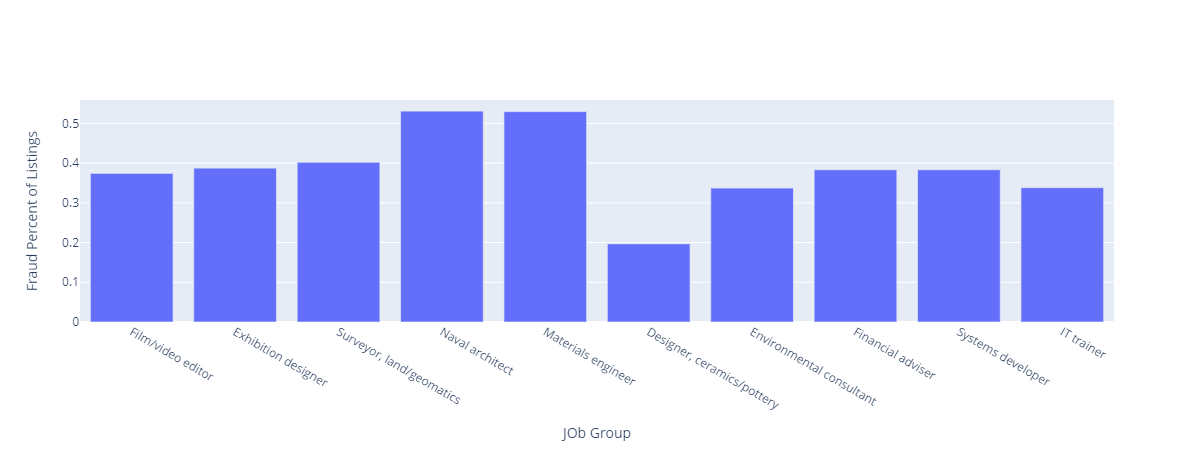

In [91]:
#Interactive dashboard to understand the transaction amount distribution based on Gender, city and age
fig = go.Figure(data=[
    go.Bar(name=rm_grp[0], x = ne_grp, y = job_plt_data[job_plt_data['label'] == rm_grp[0]]['percent_grp']),
    #go.Bar(name=rm_grp[1], x = ne_grp, y = job_plt_data[job_plt_data['label'] == rm_grp[1]]['percent_grp'])
])
# Change the bar mode
fig.update_layout(xaxis_title="JOb Group "\
                  ,yaxis_title="Fraud Percent of Listings")
fig.show()

In [92]:
from ipywidgets import interact
fig = go.FigureWidget()
scatt = fig.add_histogram()

xs = df2
@interact(state = df2['state'].unique(), \
          gender = df2['gender'].unique(),\
          age = (14,100,5),
          is_fraud = [0,1])

def update(state = 'NC',gender = 'M', age = 14,is_fraud=1):
    with fig.batch_update():
        scatt = df2[(df2['state'] == state) \
                   & (df2['gender'] == gender) \
                   & (df2['age'] >= age) \
                   & (df2['is_fraud'] == is_fraud)]['amt']
        fig.data[0].x=scatt
fig.update_layout(xaxis_title="Number of transaction"
                  ,yaxis_title="Transaction amount")


interactive(children=(Dropdown(description='state', options=('NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', '…

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '560cb054-e083-41f1-8844-8a8b436a1d9f',…

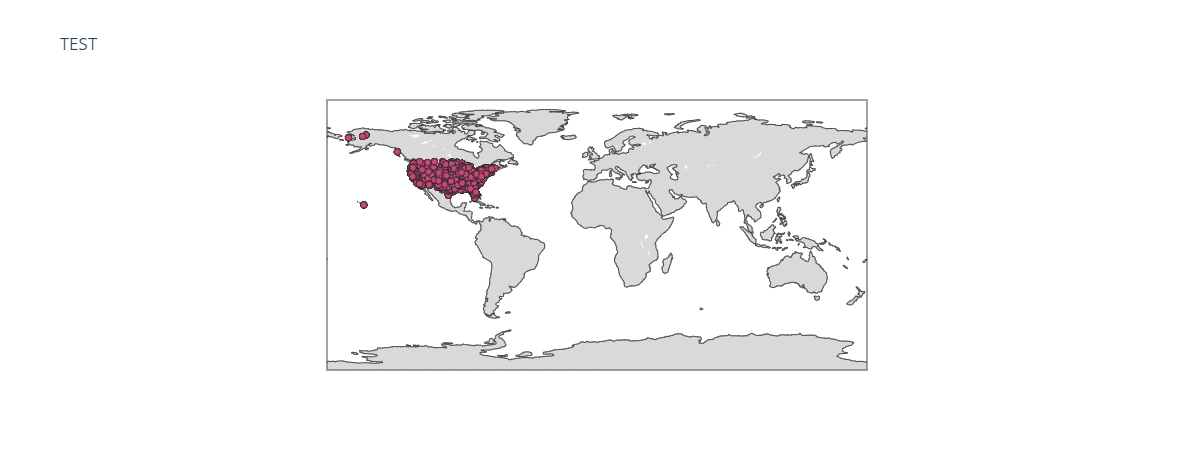

In [93]:
#Interactive map for transactions for different cities
dftemp_fraud = df2[df2['is_fraud'] == 1]
fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = dftemp_fraud['long'],
        lat = dftemp_fraud['lat'],
        #text = df_sub['text'],
        marker = dict(
            #size = df_sub['total_cases']/scale,
            color = dftemp_fraud['is_fraud'],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'TEST'))
fig.update_layout( title_text = 'TEST',
                 geo = dict(
                     landcolor = 'rgb(217,217,217)',),
                  mapbox_style="open-street-map"
                 )



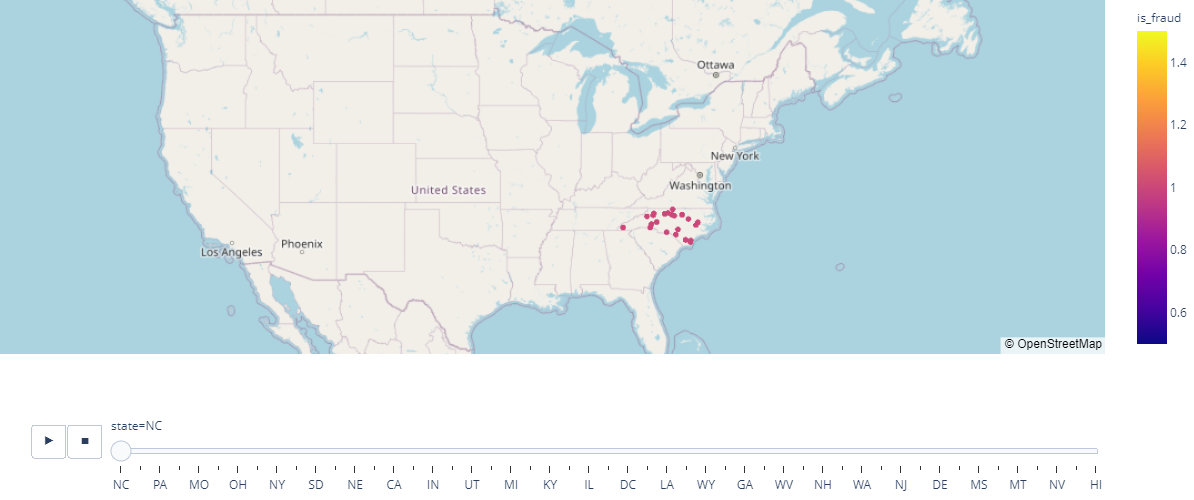

In [96]:
import plotly.express as px
df2_fraud = df2[df2['is_fraud'] == 1]
df_newone = px.data.gapminder()
fig = px.scatter_mapbox(df2_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud", animation_frame='state', color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()





In [97]:
#Test-Train Split
#Feature is X_cols and label is whether the transaction is fraud or not
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

In [98]:
#Importing Library
from sklearn.model_selection import train_test_split

In [99]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df2[df2['is_fraud'] == 0]['amt'].count()
df2_class_fraud = df2[df2['is_fraud'] == 1]
df2_class_nonfraud = df2[df2['is_fraud'] == 0]

In [100]:
#OverSampling
df2_class_fraud_oversample = df2_class_fraud.sample(cnt_non_fraud, replace=True)
df2_oversampled = pd.concat([df2_class_nonfraud, df2_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df2_oversampled['is_fraud'].value_counts())

Random over-sampling:
1    1842831
0    1842831
Name: is_fraud, dtype: int64


In [101]:
df2_oversampled.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category        amt      first     last gender  \
0       misc_net   4.970000   Jennifer    Banks      F   
1    grocery_pos 107.230000  Stephanie     Gill      F   
2  entertainment 220.110000     Edward  Sanchez      M   
3  gas_transport  45.000000     Jeremy    White      M   
4       misc_pos  41.960000      Tyler   Garcia      M   

                         street            city state    zip       lat  \
0                561 Perry Cove  Moravian Falls    NC  28654 36.078800   
1  43039 Riley Greens Suite 393          Orient    WA  99160 48.887800   
2      594 White Dale Suite 530      Malad City    ID  83252 42.180800   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.230600   
4              408 Bradley Rest        Doe Hill    VA  24433 38.420700   

         long  city_pop                                job        dob  \
0  -81.178100      3495          Psychologist, counselling 1988-03-09   
1 -118.210500       149  Special educational needs teacher 1978-06-21   
2 -112.262000      4154        Nature conservation officer 1962-01-19   
3 -112.113800      1939                    Patent attorney 1967-01-12   
4  -79.462900        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_hour day_of_week year_month       age  \
0         0           0     Tuesday    2019-01 31.000000   
1         0           0     Tuesday    2019-01 41.000000   
2         0           0     Tuesday    2019-01 57.000000   
3         0           0     Tuesday    2019-01 52.000000   
4         0           0     Tuesday    2019-01 33.000000   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0     

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df2_oversampled[X_cols],df2_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [103]:
X_train.shape

(2579963, 29)

In [104]:
X_test.shape

(1105699, 29)

In [105]:
#Importing Library
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [106]:
logreg = LogisticRegression(random_state=42)

In [107]:
#Building Logistic Regression  Model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [108]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [110]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[1202339   87669]
 [ 306567  983388]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86   1290008
           1       0.92      0.76      0.83   1289955

    accuracy                           0.85   2579963
   macro avg       0.86      0.85      0.85   2579963
weighted avg       0.86      0.85      0.85   2579963



In [111]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[515484  37339]
 [132392 420484]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86    552823
           1       0.92      0.76      0.83    552876

    accuracy                           0.85   1105699
   macro avg       0.86      0.85      0.85   1105699
weighted avg       0.86      0.85      0.85   1105699



In [112]:
#Building Decision Tree Model
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [113]:
#Decision Tree Model Evaluation
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results
[[1288950    1058]
 [      0 1289955]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [114]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results
[[552220    603]
 [     0 552876]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
#Random-Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_clf = RandomForestClassifier(random_state=345)

param_grid = { 
    'n_estimators': [50],
    'max_depth' : [8,16,20]
}

In [119]:
#Building Random Forest Model
rf_clf = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.5min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [120]:
#Random Forest Classifier - Model Evaluation
print("Train Results")
pred_train = rf_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

Train Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.6s finished


[[1289866     142]
 [    272 1289683]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1290008
           1       1.00      1.00      1.00   1289955

    accuracy                           1.00   2579963
   macro avg       1.00      1.00      1.00   2579963
weighted avg       1.00      1.00      1.00   2579963



In [121]:
print("Test Results")
pred_test = rf_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Test Results


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.3s finished


[[552727     96]
 [   109 552767]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552823
           1       1.00      1.00      1.00    552876

    accuracy                           1.00   1105699
   macro avg       1.00      1.00      1.00   1105699
weighted avg       1.00      1.00      1.00   1105699



In [122]:
import sys
!{sys.executable} -m pip install xgboost

You should consider upgrading via the 'C:\Users\EAMA\anaconda3\python.exe -m pip install --upgrade pip' command.


In [123]:
#Gradient Boosting Tress - Model Training
#Building XG Boost Model
from xgboost import XGBClassifier

# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=345, verbose = 1)
xbt_model.fit(X_train, y_train)

xbt_model.fit(X_train, y_train)

[20:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:30:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used bu

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=345,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [124]:
pred_train = xbt_model.predict(X_train)

In [125]:
print(confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))

[[1281677    8331]
 [  29422 1260533]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1290008
           1       0.99      0.98      0.99   1289955

    accuracy                           0.99   2579963
   macro avg       0.99      0.99      0.99   2579963
weighted avg       0.99      0.99      0.99   2579963



In [126]:
#Model Evaluation
pred_test = xbt_model.predict(X_test)

In [127]:
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[549240   3583]
 [ 12694 540182]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    552823
           1       0.99      0.98      0.99    552876

    accuracy                           0.99   1105699
   macro avg       0.99      0.99      0.99   1105699
weighted avg       0.99      0.99      0.99   1105699



In [128]:
#Cost benifit Analysis
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count            1852394.000000              1842743.000000   
1     mean                 70.063567                   67.651278   
2      std                159.253975                  153.548108   
3      min                  1.000000                    1.000000   
4      50%                 47.450000                   47.240000   
5      95%                195.340000                  189.590000   
6    99.9%               1517.241050                 1519.622580   
7      max              28948.900000                28948.900000   

   Fraud Amt Distribution  
0             9651.000000  
1              530.661412  
2              391.028873  
3                1.060000  
4              390.000000  
5             1084.090000  
6             1293.127000  
7             1376.040000

In [129]:
#Monthly num_of_fraud_transactions  
df_timeline02

year_month  num_of_fraud_transactions  fraud_customers
0     2019-01                        506               50
1     2019-02                        517               53
2     2019-03                        494               49
3     2019-04                        376               41
4     2019-05                        408               42
5     2019-06                        354               35
6     2019-07                        331               36
7     2019-08                        382               39
8     2019-09                        418               44
9     2019-10                        454               50
10    2019-11                        388               41
11    2019-12                        592               62
12    2020-01                        343               40
13    2020-02                        336               35
14    2020-03                        444               45
15    2020-04                        302               36
16    2020-05                        527               54
17    2020-06                        467               47
18    2020-07                        321               35
19    2020-08                        415               41
20    2020-09                        340               35
21    2020-10                        384               39
22    2020-11                        294               31
23    2020-12                        258               26

In [130]:
#Average number of fraudulent transaction per month
df_timeline02['num_of_fraud_transactions'].mean()

402.125

In [131]:
df_timeline01

year_month  num_of_transactions  customers
0     2019-01                52525        913
1     2019-02                49866        918
2     2019-03                70939        916
3     2019-04                68078        913
4     2019-05                72532        910
5     2019-06                86064        908
6     2019-07                86596        910
7     2019-08                87359        911
8     2019-09                70652        913
9     2019-10                68758        912
10    2019-11                70421        911
11    2019-12               141060        916
12    2020-01                52202        911
13    2020-02                47791        909
14    2020-03                72850        912
15    2020-04                66892        914
16    2020-05                74343        915
17    2020-06                87805        911
18    2020-07                85848        911
19    2020-08                88759        908
20    2020-09                69533        914
21    2020-10                69348        913
22    2020-11                72635        909
23    2020-12               139538        910

In [132]:
#Average Number of transactions by month(Cost Benifit Analysis)
print(df_timeline01['num_of_transactions'].mean())

77183.08333333333


In [133]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

is_fraud    count  percentage
0         0  1842743   99.478999
1         1     9651    0.521001

In [134]:
'''Total number of frauds in data sets are 9651, this data set has 24 months, so on average 402.125 frauds per month

Our Decision Tree model has 100% recall, so our model is able to predict all the frauds'''

'Total number of frauds in data sets are 9651, this data set has 24 months, so on average 402.125 frauds per month\n\nOur Decision Tree model has 100% recall, so our model is able to predict all the frauds'